# _Importing important libraries_


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# _Importing data_


In [79]:
df = pd.read_csv(r"C:\Users\22831\Downloads\archive (4)\twitter_training.csv")
df.columns = ["User_ID", "Company", "Review type", "Review"]
df

,User_ID,Company,Review type,Review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


# _EDA_


In [80]:
df.shape

(74681, 4)

In [81]:
df.head()

,User_ID,Company,Review type,Review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [82]:
df.tail()

,User_ID,Company,Review type,Review
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      74681 non-null  int64 
 1   Company      74681 non-null  object
 2   Review type  74681 non-null  object
 3   Review       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [84]:
df.describe()

,User_ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [85]:
df["Review type"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [86]:
print(df["Company"].unique())
print("Total No of comanies :", df["Company"].unique().size)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
Total No of comanies : 32


## _Finding null values_


In [87]:
df.isnull().sum()

User_ID          0
Company          0
Review type      0
Review         686
dtype: int64

In [88]:
df.dropna(inplace=True)

In [89]:
df.isnull().sum()

User_ID        0
Company        0
Review type    0
Review         0
dtype: int64

# _Plot of companies vs reviews_


C:\Users\22831\AppData\Local\Temp\ipykernel_11668\62053936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.values, y=count.index, palette="viridis")


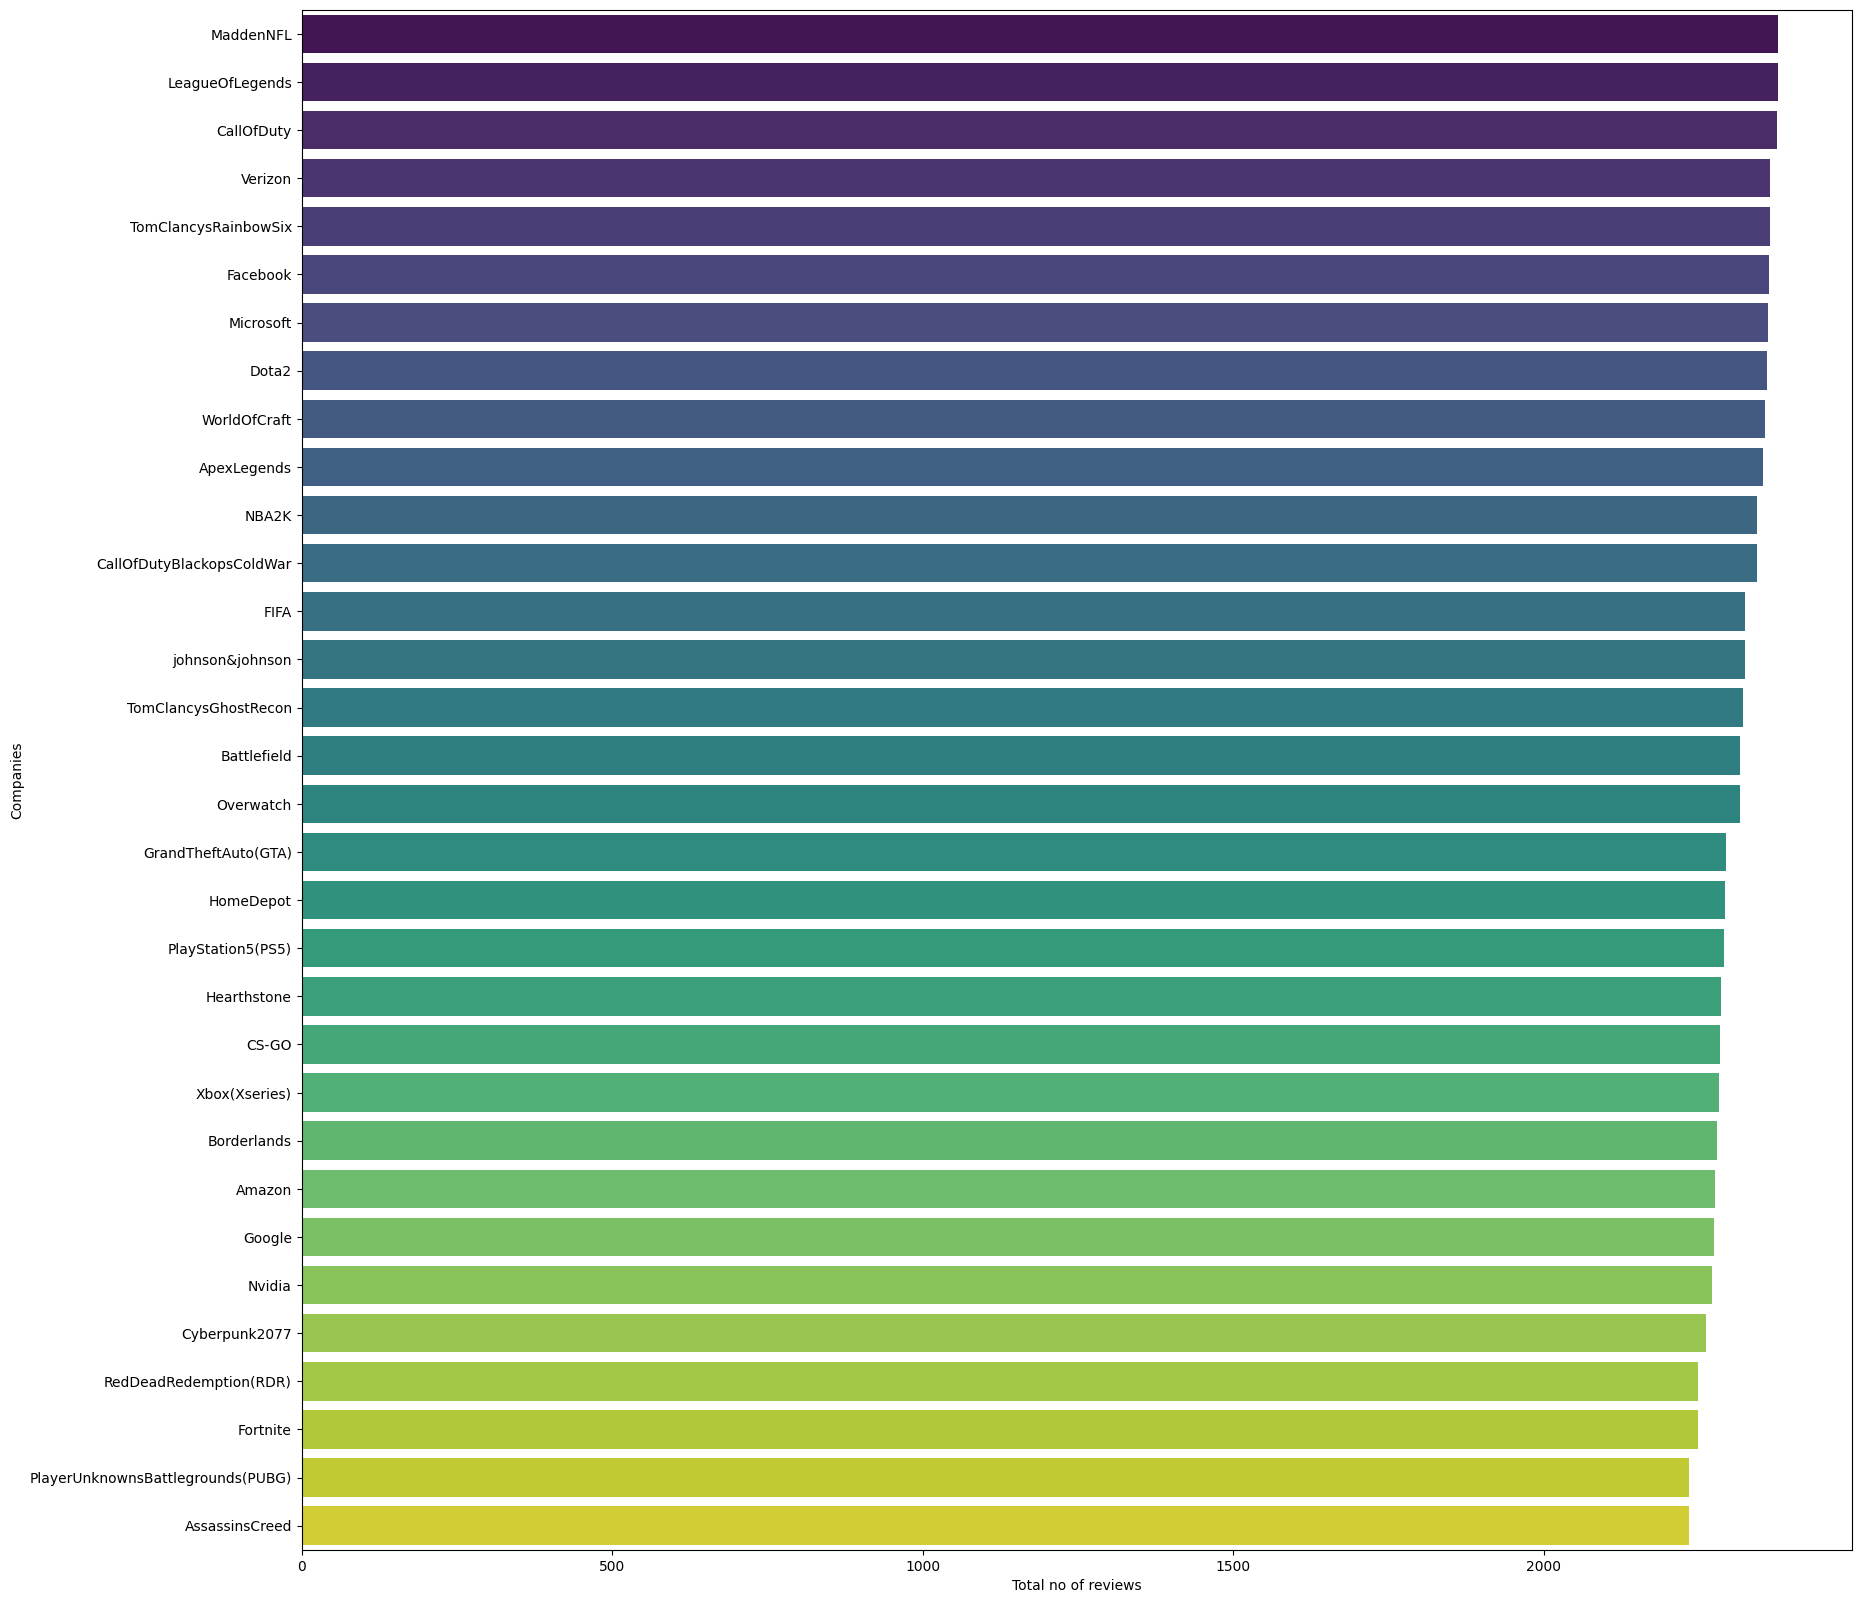

In [100]:
count = df["Company"].value_counts()

plt.figure(figsize=(20, 20))
sns.barplot(x=count.values, y=count.index, palette="viridis")
plt.xlabel("Total no of reviews")
plt.ylabel("Companies")
plt.show()

# _Pie chat of trypes f reviews and percent_


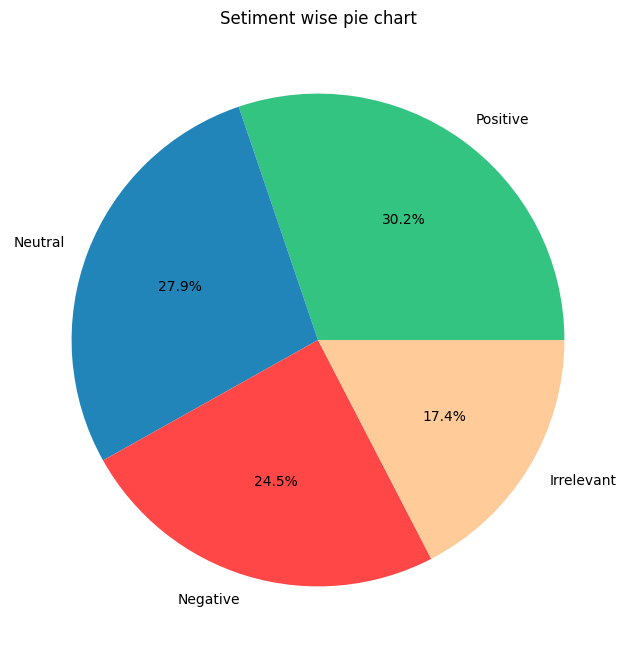

In [140]:
count_review = df["Review type"].value_counts()
label = ["Positive", "Neutral", "Negative", "Irrelevant"]
plt.figure(figsize=(8, 8))
plt.pie(
    count_review,
    labels=label,
    autopct="%1.1f%%",
    colors=["#33c481", "#2285ba", "#ff4747", "#ffcc99"],
)
plt.title("Setiment wise pie chart")
plt.show()

# _plot of types of reviews vs companies_


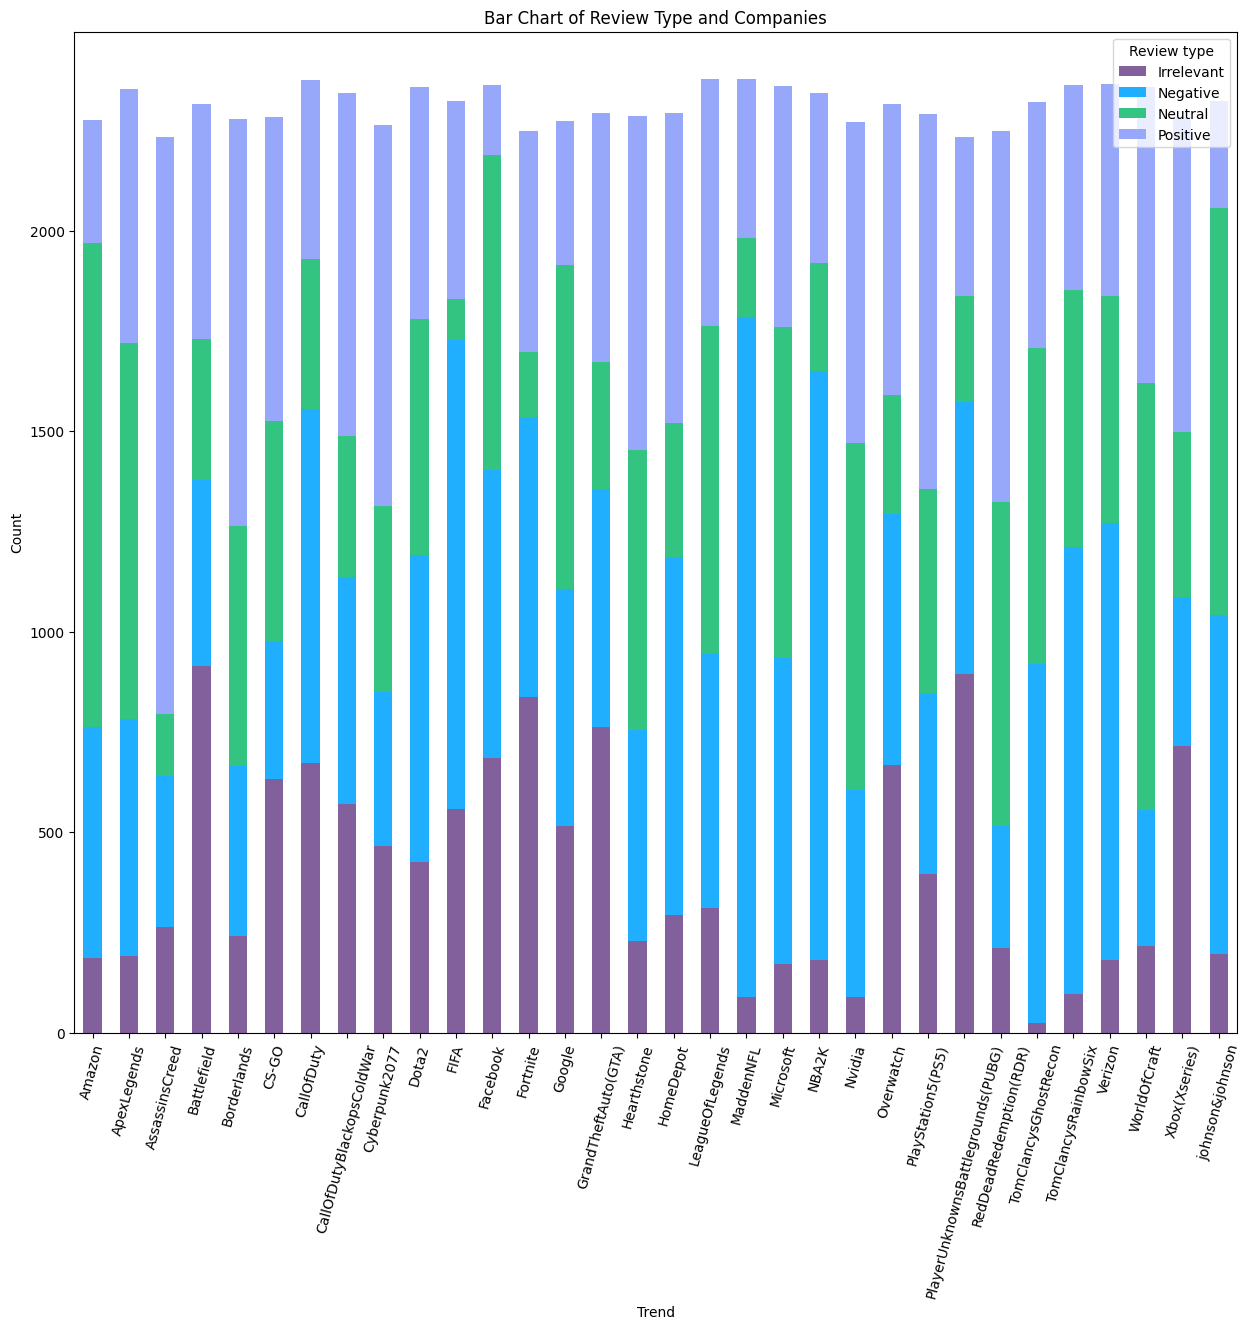

In [148]:
review = pd.crosstab(df["Company"], df["Review type"])
review.plot(
    kind="bar",
    stacked=True,
    figsize=(15, 13),
    color=("#81609b", "#20afff", "#33c481", "#97a7f9"),
)
plt.xlabel("Trend")
plt.ylabel("Count")
plt.title("Bar Chart of Review Type and Companies")
plt.xticks(rotation=75)
plt.show()